<a href="https://colab.research.google.com/github/arbiansyah10/2206074/blob/main/2206074.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

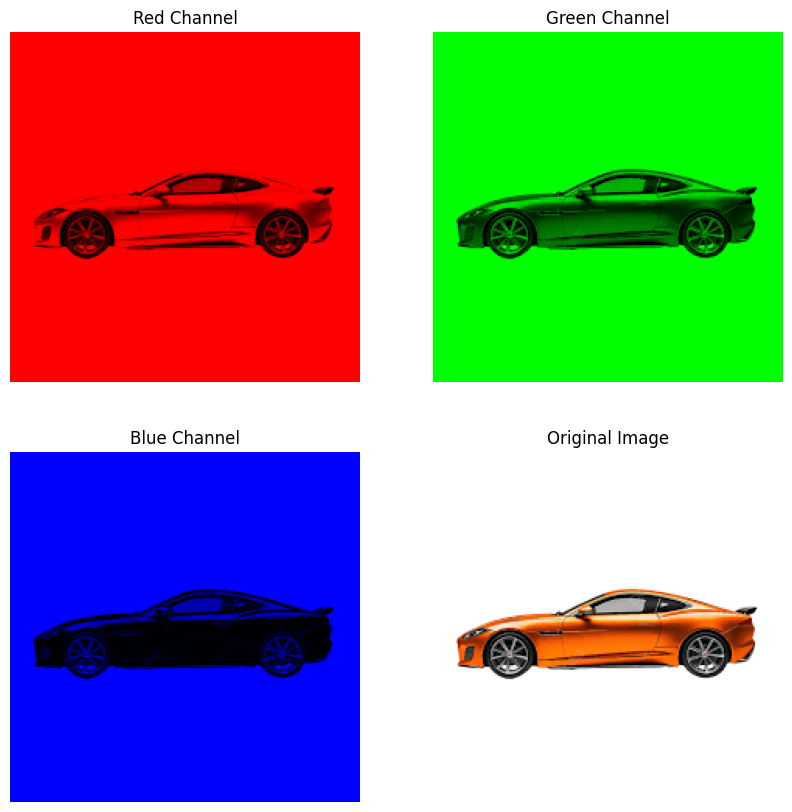

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def load_and_convert_image(image_path):
    """Load image and convert it from BGR to RGB format"""
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def split_channels(image_rgb):
    """Split an RGB image into Red, Green, and Blue channels"""
    return cv2.split(image_rgb)

def visualize_channels(image_rgb, R, G, B):
    """Visualize the original image and the R, G, B channels separately"""
    zeros = np.zeros(image_rgb.shape[:2], dtype="uint8")
    channels = {
        "Red Channel": cv2.merge([R, zeros, zeros]),
        "Green Channel": cv2.merge([zeros, G, zeros]),
        "Blue Channel": cv2.merge([zeros, zeros, B]),
        "Original Image": image_rgb
    }

    # Visualization
    plt.figure(figsize=(10, 10))
    for i, (title, img) in enumerate(channels.items(), 1):
        plt.subplot(2, 2, i)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')

    plt.show()

# Step 1: Path ke gambar
image_path = '/content/download (1).png'  # Ganti dengan path gambar Anda

# Step 2: Load dan konversi gambar
image_rgb = load_and_convert_image(image_path)

# Step 3: Pisahkan gambar menjadi kanal R, G, B
R, G, B = split_channels(image_rgb)

# Step 4: Visualisasi kanal
visualize_channels(image_rgb, R, G, B)


<ipython-input-3-ce2856cb53ee>:23: RuntimeWarning: divide by zero encountered in log
  log_mapped = c * (np.log(channel + 1))
<ipython-input-3-ce2856cb53ee>:24: RuntimeWarning: invalid value encountered in cast
  return np.array(log_mapped, dtype=np.uint8)


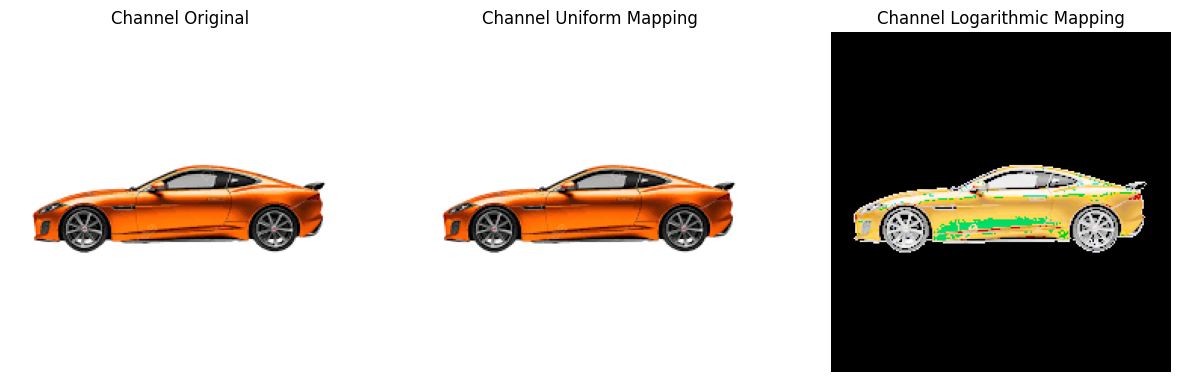

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def load_and_convert_image(image_path):
    """Load image and convert it from BGR to RGB format"""
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def split_channels(image_rgb):
    """Split an RGB image into Red, Green, and Blue channels"""
    return cv2.split(image_rgb)

def uniform_mapping(channel):
    """Apply uniform normalization to a channel"""
    return cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX)

def logarithmic_mapping(channel):
    """Apply logarithmic mapping to a channel"""
    c = 255 / np.log(1 + np.max(channel))
    log_mapped = c * (np.log(channel + 1))
    return np.array(log_mapped, dtype=np.uint8)

def visualize_mappings(R, G, B, title_prefix):
    """Visualize the channels with original, uniform, and logarithmic mapping"""
    zeros = np.zeros(R.shape, dtype="uint8")

    # Original, Uniform, and Logarithmic Mappings
    mappings = {
        f"{title_prefix} Original": (R, G, B),
        f"{title_prefix} Uniform Mapping": (
            uniform_mapping(R),
            uniform_mapping(G),
            uniform_mapping(B)
        ),
        f"{title_prefix} Logarithmic Mapping": (
            logarithmic_mapping(R),
            logarithmic_mapping(G),
            logarithmic_mapping(B)
        )
    }

    # Visualization
    plt.figure(figsize=(15, 15))
    for i, (title, (r, g, b)) in enumerate(mappings.items(), 1):
        mapped_image = cv2.merge([r, g, b])
        plt.subplot(3, 3, i)
        plt.imshow(mapped_image)
        plt.title(title)
        plt.axis('off')

    plt.show()

# Step 1: Path ke gambar
image_path = '/content/download (1).png'  # Ganti dengan path gambar Anda

# Step 2: Load dan konversi gambar
image_rgb = load_and_convert_image(image_path)

# Step 3: Pisahkan gambar menjadi kanal R, G, B
R, G, B = split_channels(image_rgb)

# Step 4: Visualisasi pemetaan intensitas
visualize_mappings(R, G, B, title_prefix="Channel")
